In [1]:
!pip install pandas
!pip install xlrd
!pip install geopandas
!pip install matplotlib
!pip install folium
!pip install sweetviz

     |████████████████████████████████| 9.9 MB 5.9 MB/s eta 0:00:011
     |████████████████████████████████| 15.3 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 8.3 MB/s  eta 0:00:01
     |████████████████████████████████| 994 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 619 kB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 10.3 MB 6.6 MB/s eta 0:00:01     |██████████████████████████      | 8.4 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 15.1 MB 10.5 MB/s eta 0:00:01   |████████████████▋               | 

In [33]:
import pandas as pd
import geopandas
from geopandas import GeoDataFrame as gpd
import matplotlib.pyplot as plt
import sweetviz as sv
import numpy as np

# 1. Carbon Flux to the Atmosphere from Land-Use Changes 1850-2005 Dataset

In [5]:
df_land_use = pd.read_excel("../Global_land-use_flux-1850_2005.xls",sheet_name="net fluxes")
df_land_use.head()

,Year,Global,USA,Canada,S+C America,Europe,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,Pac.Dev.Reg
0,1850,500.6,164.0922,5.5476,23.4757,55.0441,3.9840,-1.3484,58.5571,101.8392,87.3469,2.0458
1,1851,492.7,165.7256,5.3626,23.1520,55.0156,3.9839,-1.1192,58.5525,93.0766,86.9100,2.0419
2,1852,548.5,230.6725,5.3380,22.8618,54.9874,3.9837,-1.0033,58.8781,83.8307,86.9385,2.0379
3,1853,546.8,238.5149,5.3138,22.6017,54.9590,3.9835,-1.0513,59.2207,74.2140,86.9935,2.0338
4,1854,544.8,246.1846,5.2899,22.3687,54.9304,3.9833,-0.9855,59.5802,64.3129,87.0630,2.0297


<AxesSubplot:xlabel='Year'>

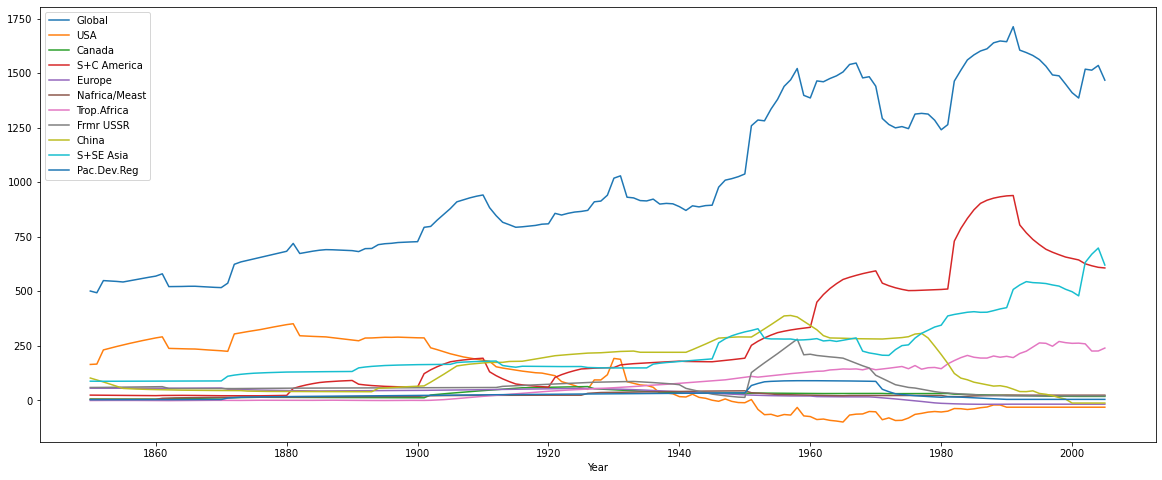

In [6]:
df_land_use.set_index('Year').plot(figsize=(20, 8))

<AxesSubplot:xlabel='Year'>

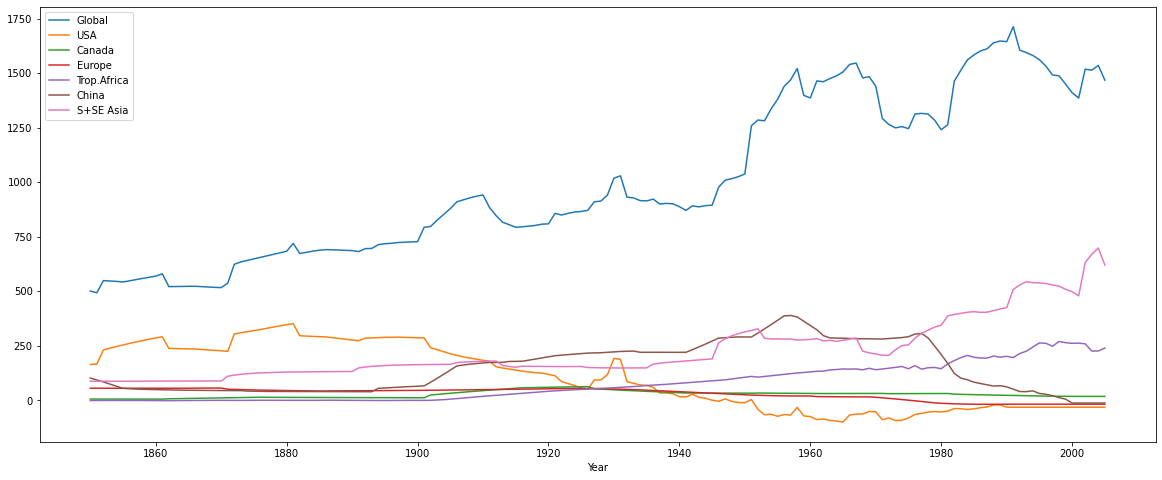

In [7]:
select_countries = ["Year", "Global", "USA", "Canada" ,"Europe","Trop.Africa", "China", "S+SE Asia"]
df_land_use = df_land_use[select_countries]
df_land_use.set_index('Year').plot(figsize=(20, 8))

# 2. Methane Dataset

In [8]:
methane = pd.read_excel("../methane.xls",sheet_name="NASA TRIPS ADJUSTED")
methane.head()

,Unnamed: 0,Note: -999.000 implies a missing value; ppmv indicates parts per million per volume,Unnamed: 2,Latitude,Longitude,Methane
0,Can,Location,Mo-Day-Yr,(digital degrees),(digital degrees),CH4 (ppmv)
1,6213,"Barrow Weather Station (NOAA), Alaska",1983-03-25 00:00:00,71.3,-156.78,1.711
2,8159,"Barrow Weather Station (NOAA), Alaska",1983-03-25 00:00:00,71.3,-156.78,1.706
3,4188,"Barrow Weather Station (NOAA), Alaska",1983-03-26 00:00:00,71.3,-156.78,1.706
4,7194,"Barrow Weather Station (NOAA), Alaska",1983-03-26 00:00:00,71.3,-156.78,1.707


## Change the name of columns

In [9]:
methane.columns = ["Can", "Location", "datetime", "Latitude", "Longitude", "CH4"]
methane.head(2).T

,0,1
Can,Can,6213
Location,Location,"Barrow Weather Station (NOAA), Alaska"
datetime,Mo-Day-Yr,1983-03-25 00:00:00
Latitude,(digital degrees),71.3
Longitude,(digital degrees),-156.78
CH4,CH4 (ppmv),1.711


## Drop the first row since the data is irrelevant

In [10]:
methane = methane.iloc[1:,:]
methane.head(2).T

,1,2
Can,6213,8159
Location,"Barrow Weather Station (NOAA), Alaska","Barrow Weather Station (NOAA), Alaska"
datetime,1983-03-25 00:00:00,1983-03-25 00:00:00
Latitude,71.3,71.3
Longitude,-156.78,-156.78
CH4,1.711,1.706


## Plot the coordinates over a country-level map

In [11]:
g_methane = gpd(methane[['Latitude', 'Longitude', 'CH4']], geometry=geopandas.points_from_xy(methane.Longitude, methane.Latitude))
g_methane.head()

,Latitude,Longitude,CH4,geometry
1,71.3,-156.78,1.711,POINT (-156.78000 71.30000)
2,71.3,-156.78,1.706,POINT (-156.78000 71.30000)
3,71.3,-156.78,1.706,POINT (-156.78000 71.30000)
4,71.3,-156.78,1.707,POINT (-156.78000 71.30000)
5,71.3,-156.78,1.708,POINT (-156.78000 71.30000)


In [12]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
# continents name
world.continent.value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Antarctica                  1
Seven seas (open ocean)     1
Name: continent, dtype: int64

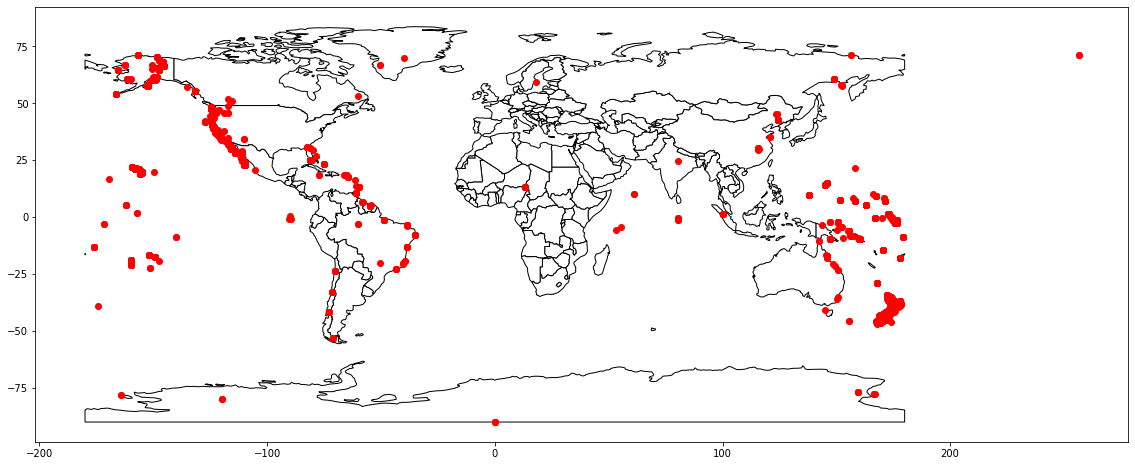

In [14]:
ax = world.plot(color='white', edgecolor='black',  figsize=(20, 8))
# We can now plot our ``GeoDataFrame``.
g_methane.plot(ax=ax, color='red')
plt.show()

In [15]:
# convert datetime into pandas datetime
methane.datetime  = pd.to_datetime(methane.datetime)
# create a year column
methane['year'] = methane.datetime.dt.year

<AxesSubplot:xlabel='year'>

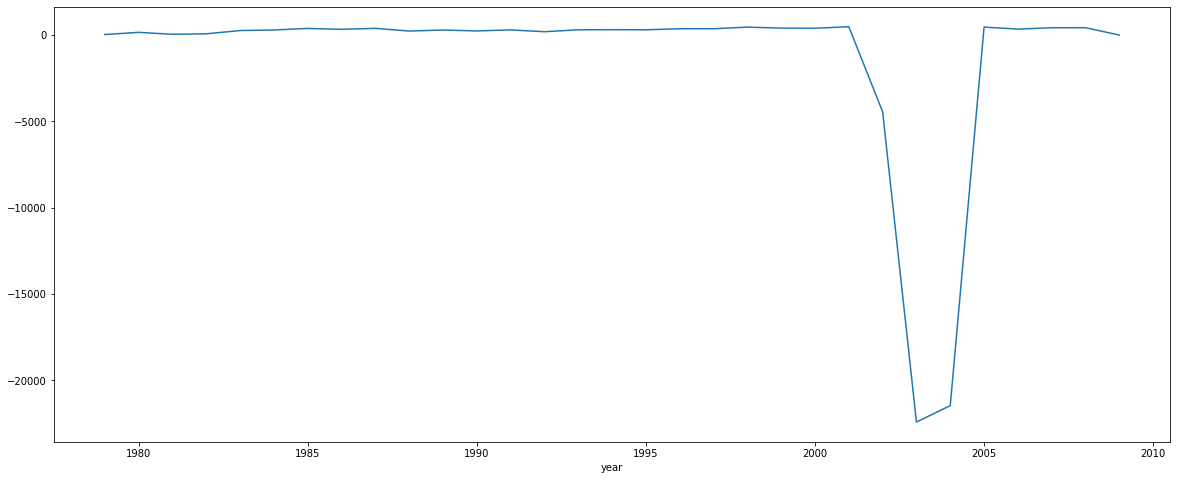

In [16]:
methane.groupby('year')['CH4'].sum().plot(figsize=(20,8))

## Negative Methane values ??

In [17]:
methane.groupby('year')['CH4'].sum()[methane.groupby('year')['CH4'].sum() < 0]

year
2002    -4437.802
2003   -22409.724
2004   -21457.837
Name: CH4, dtype: float64

## Drop the negative ones and replot the methane

<AxesSubplot:xlabel='year'>

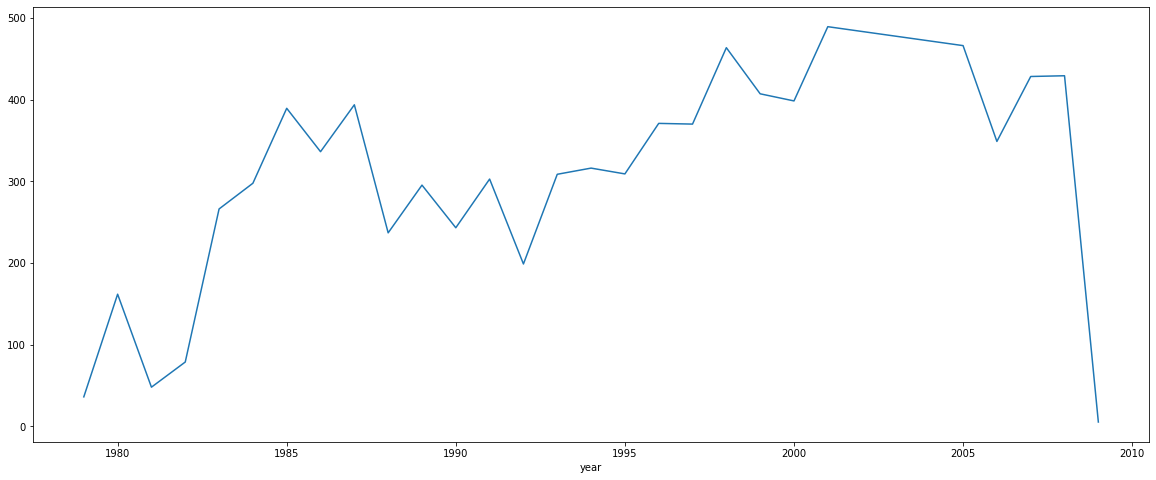

In [18]:
methane.groupby('year')['CH4'].sum()[methane.groupby('year')['CH4'].sum() > 0].plot(figsize=(20,8))
# methane was dropped significantly ???

# 3. Halogenated Organic Compounds (be continued)

In [19]:
# Change the path of filename according to your location
halogen = pd.read_excel("../comphalogens.xls", sheet_name="NASA TRIPS ADJUSTED")
halogen.head()

,Unnamed: 0,Note: -999.0 implies a missing value; pptv indicates parts per trillion by volume,Unnamed: 2,Latitude,Longitude,CFC 11,CFC 12,CFC 113,Halon 1211,Tetrachloroethene,Chloroform,Methyl Chloroform,Carbon Tetrachloride
0,Can,Location,Mo-Day-Yr,(digital degrees),(digital degrees),CFCl3 (pptv),CF2Cl2 (pptv),C2F3Cl3 (pptv),CClF2Br (pptv),C2Cl4 (pptv),CHCl3 (pptv),CH3CCl3 (pptv),CCl4 (pptv)
1,4233,Cape Blanco Lighthouse (OR),2007-09-22 00:00:00,42.83,-124.57,252,474,57.9,-999,-999,-999,-999,-999
2,4254,"Port Orford, OR",1995-06-17 14:55:00,42.75,-124.5,241,471,63.5,-999,-999,-999,-999,-999
3,2589,"Port Orford, OR",2001-09-17 00:00:00,42.75,-124.5,252,464,67.6,-999,-999,-999,-999,-999
4,NaN,"Ophir Beach, OR",1980-05-15 00:00:00,42.57,-124.38,250,464,65.8,-999,-999,-999,-999,-999


## Rename columns and drop out the first row

In [20]:
#columns = halogen.iloc[0,:].values
columns = ["Can","Location", "date","Latitude","Longitude","CFCl3","CF2Cl2","C2F3Cl3","CClF2Br","C2Cl4","CHCl3","CH3CCl3","CCl4"]
halogen.columns = columns
halogen = halogen.iloc[1:,:]
halogen.head().T

,1,2,3,4,5
Can,4233,4254,2589,NaN,351
Location,Cape Blanco Lighthouse (OR),"Port Orford, OR","Port Orford, OR","Ophir Beach, OR","Ophir Beach, OR"
date,2007-09-22 00:00:00,1995-06-17 14:55:00,2001-09-17 00:00:00,1980-05-15 00:00:00,1980-11-15 00:00:00
Latitude,42.83,42.75,42.75,42.57,42.57
Longitude,-124.57,-124.5,-124.5,-124.38,-124.38
CFCl3,252,241,252,250,234
CF2Cl2,474,471,464,464,439
C2F3Cl3,57.9,63.5,67.6,65.8,55.5
CClF2Br,-999,-999,-999,-999,-999
C2Cl4,-999,-999,-999,-999,-999


In [21]:
halogen.dtypes

Can          object
Location     object
date         object
Latitude     object
Longitude    object
CFCl3        object
CF2Cl2       object
C2F3Cl3      object
CClF2Br      object
C2Cl4        object
CHCl3        object
CH3CCl3      object
CCl4         object
dtype: object

In [36]:
# convert float values into numeric
numeric_cols = ["Latitude","Longitude","CFCl3","CF2Cl2","C2F3Cl3","CClF2Br","C2Cl4","CHCl3","CH3CCl3","CCl4"]
halogen[numeric_cols] = halogen[numeric_cols].astype(np.number)
# convert type of date column from object to pandas datetime
halogen.date = pd.to_datetime(halogen.date)
# create a year derived from date
halogen['year'] = halogen.date.dt.year
halogen.dtypes

Can                  object
Location             object
date         datetime64[ns]
Latitude            float64
Longitude           float64
CFCl3               float64
CF2Cl2              float64
C2F3Cl3             float64
CClF2Br             float64
C2Cl4               float64
CHCl3               float64
CH3CCl3             float64
CCl4                float64
year                  int64
dtype: object

<AxesSubplot:xlabel='year'>

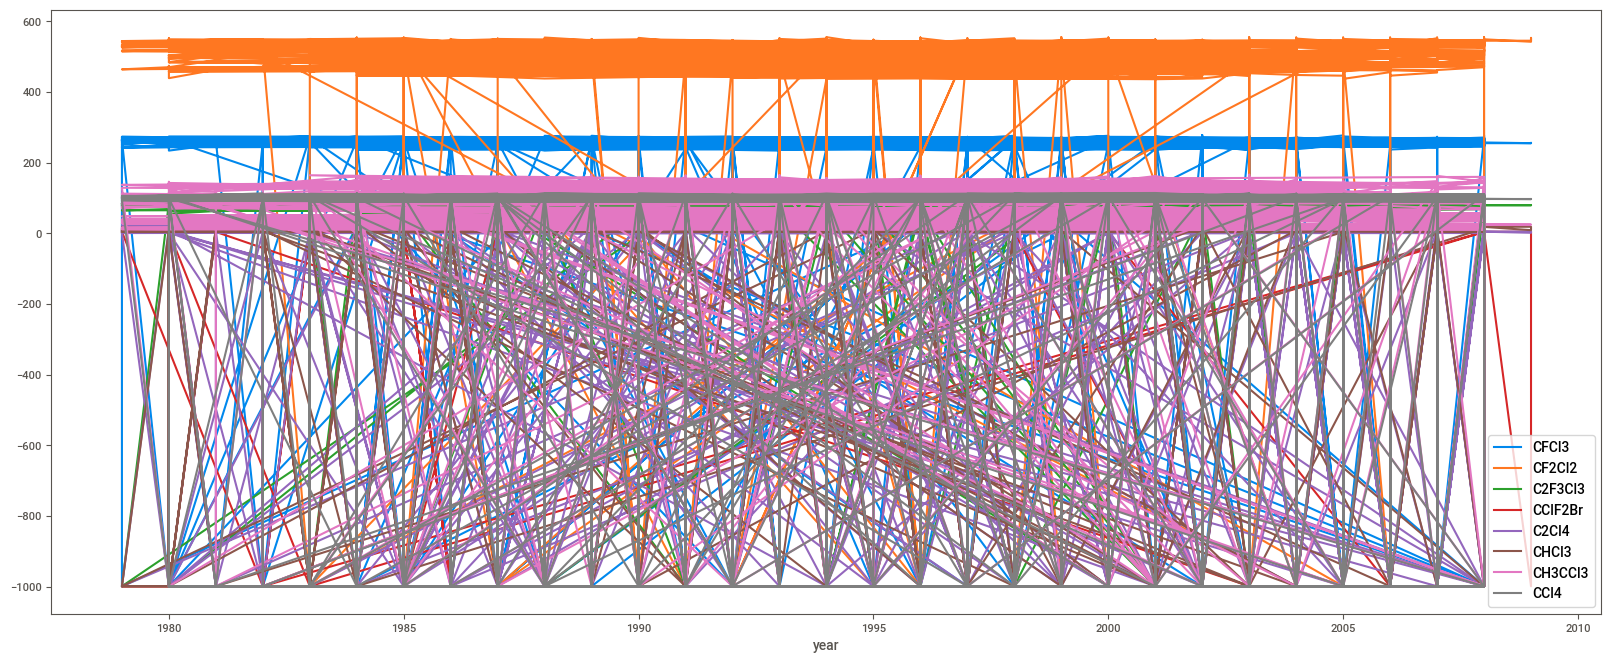

In [37]:
halogen.set_index(halogen.year)[["CFCl3","CF2Cl2","C2F3Cl3","CClF2Br","C2Cl4","CHCl3","CH3CCl3","CCl4"]].plot(figsize=(20,8))

                                             |          | [  0%]   00:00 -> (? left)


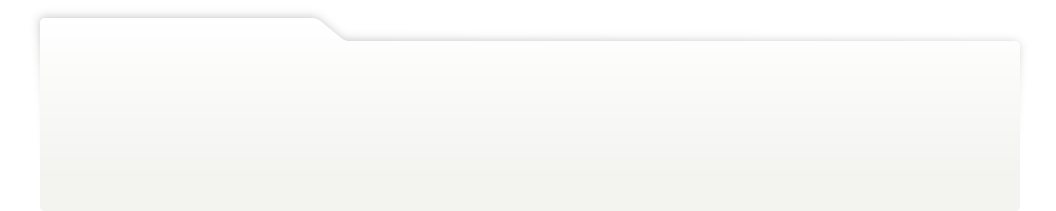
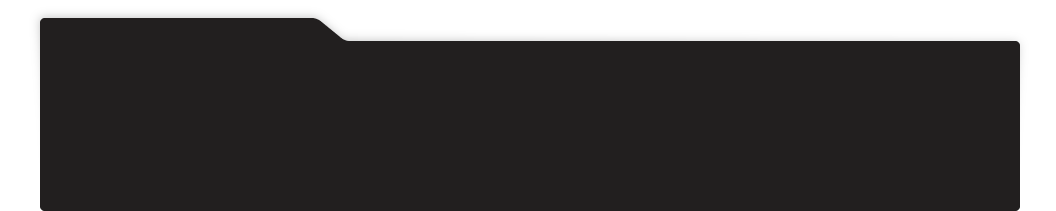
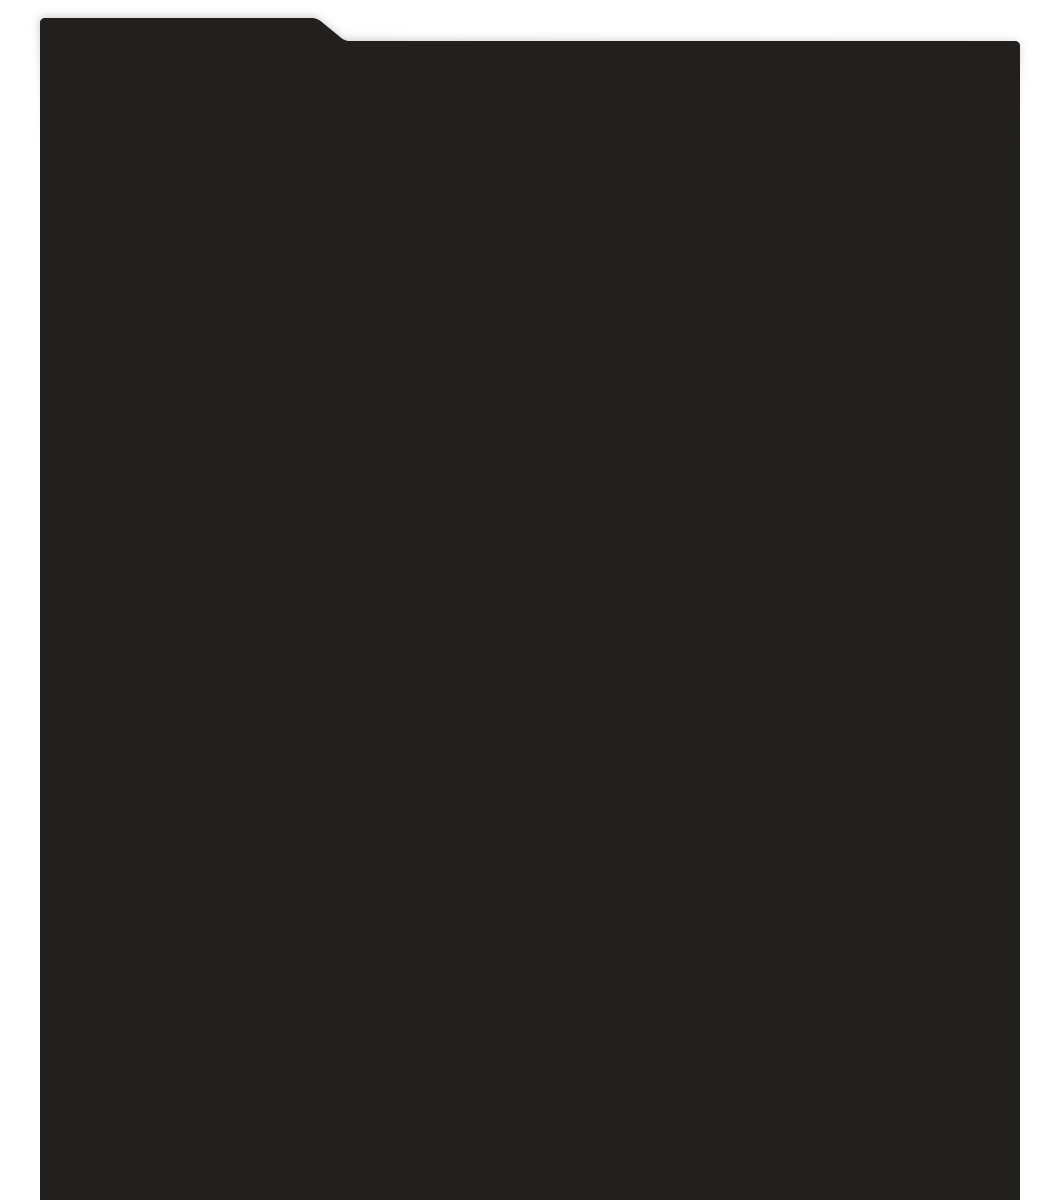
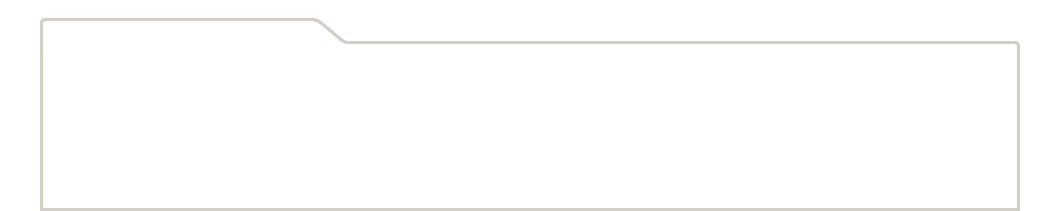
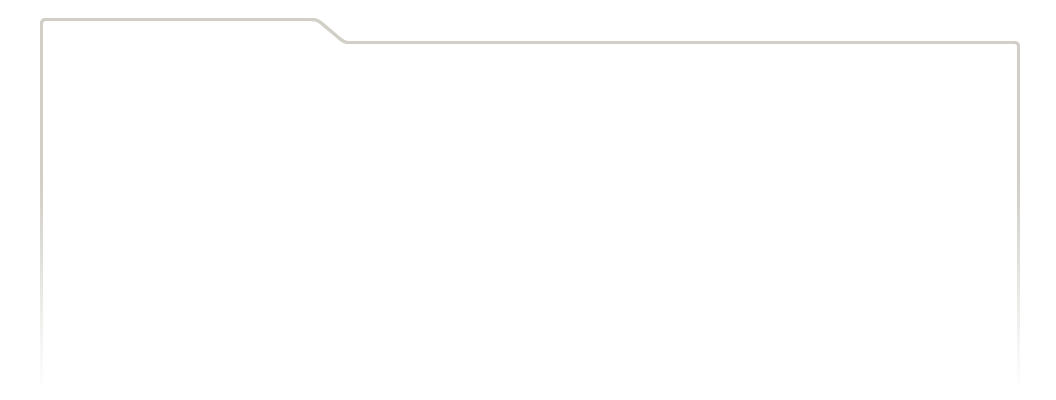
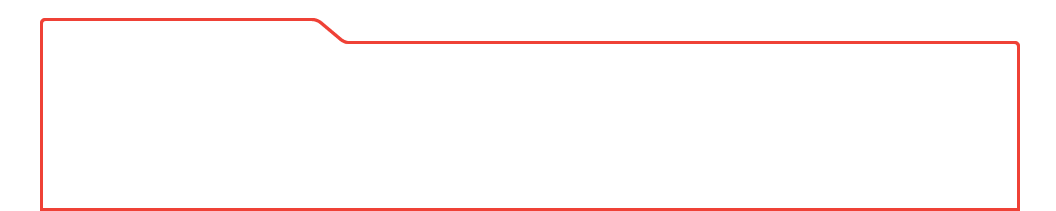
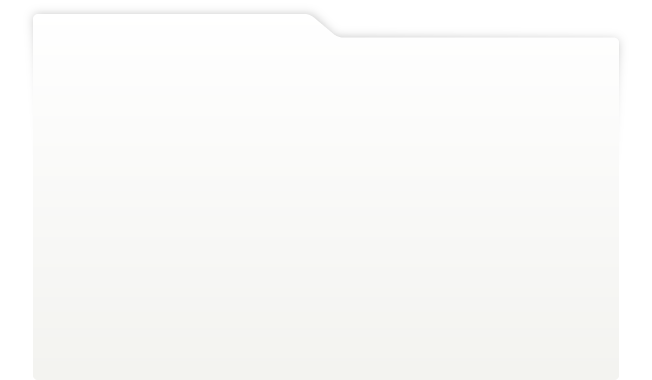
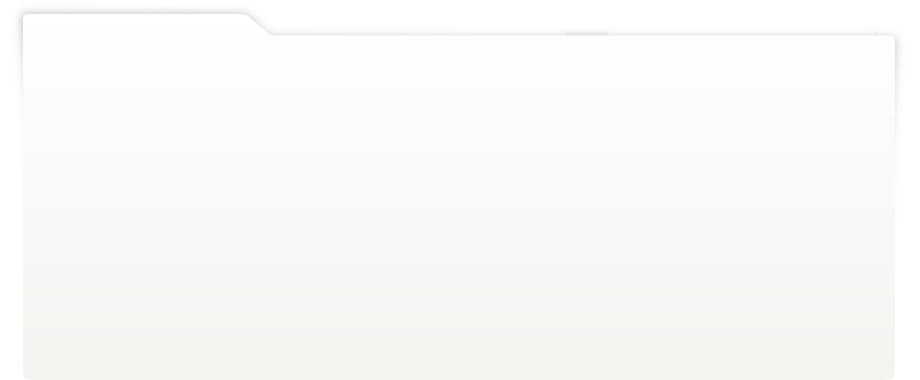
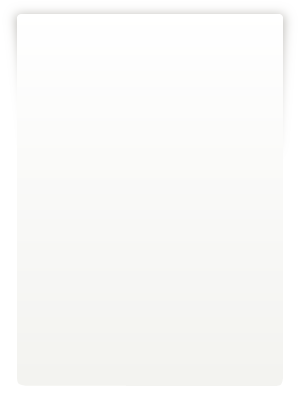
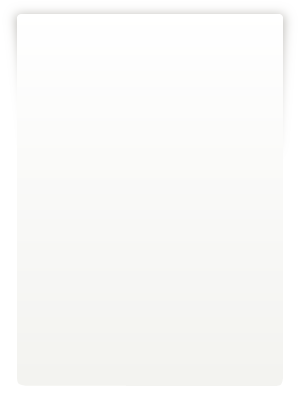
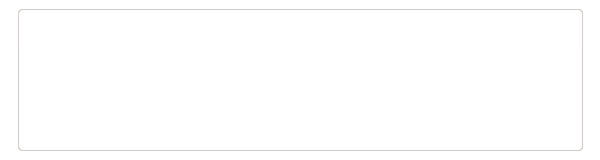
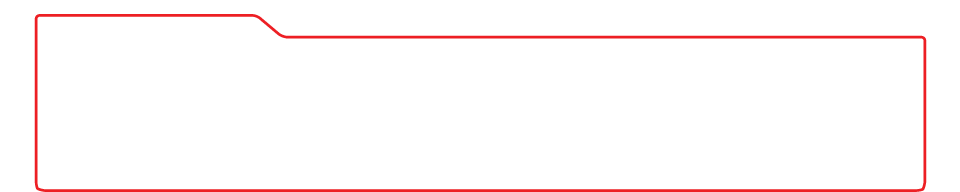
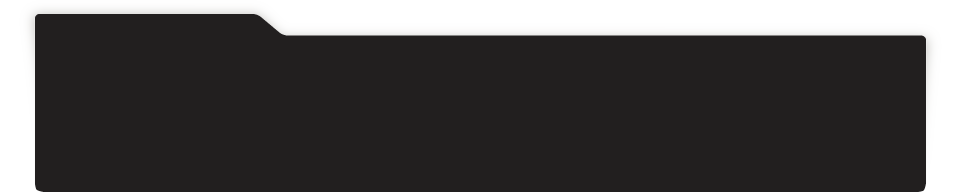
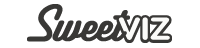
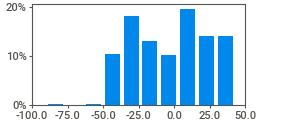
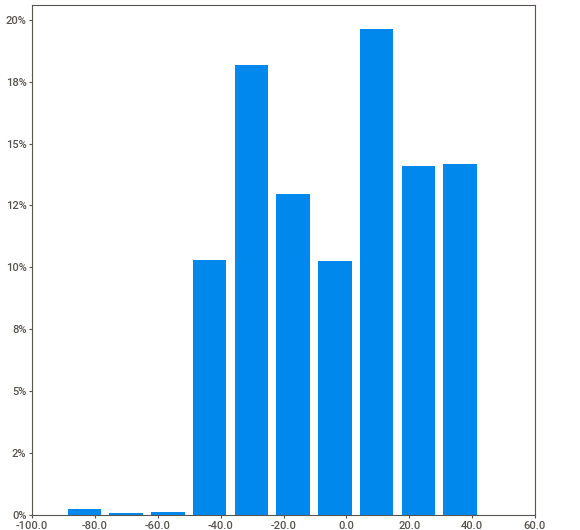
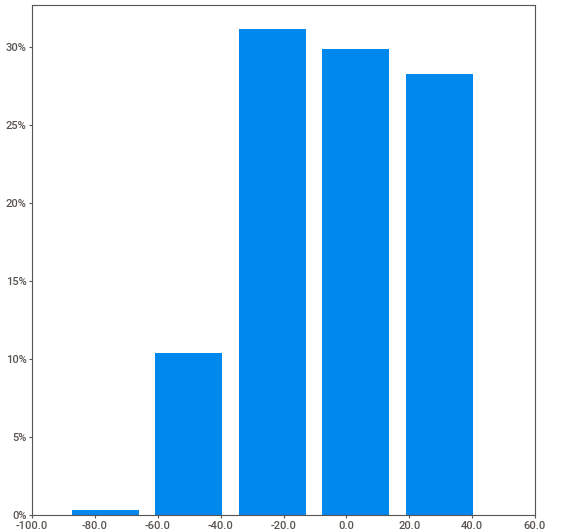
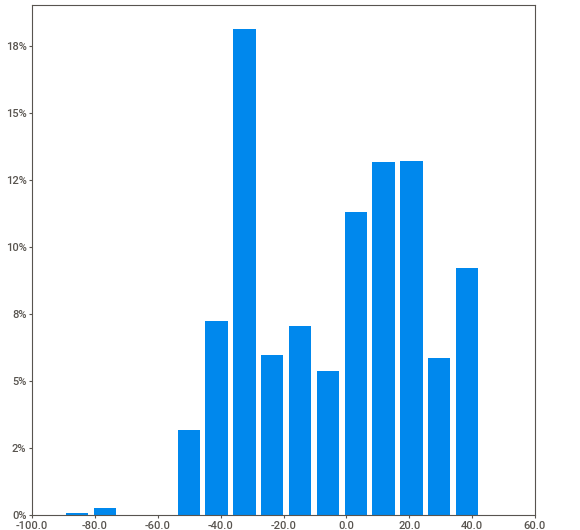
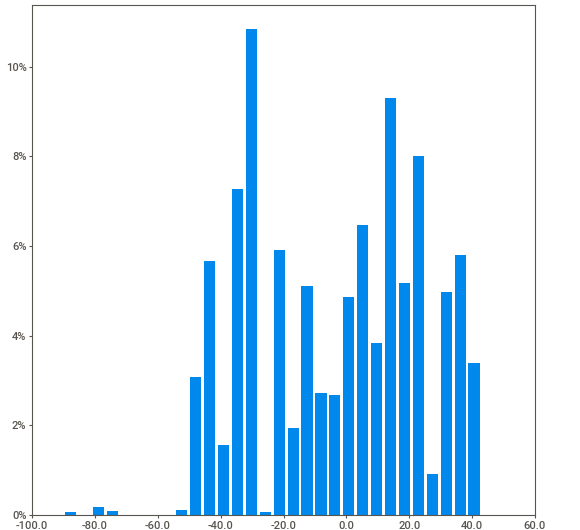
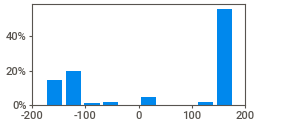
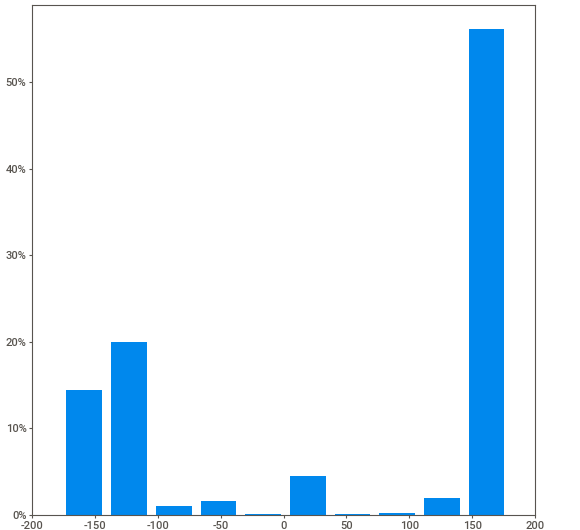
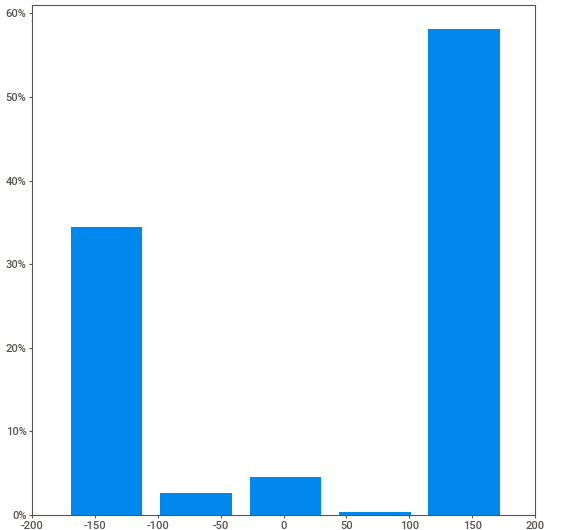
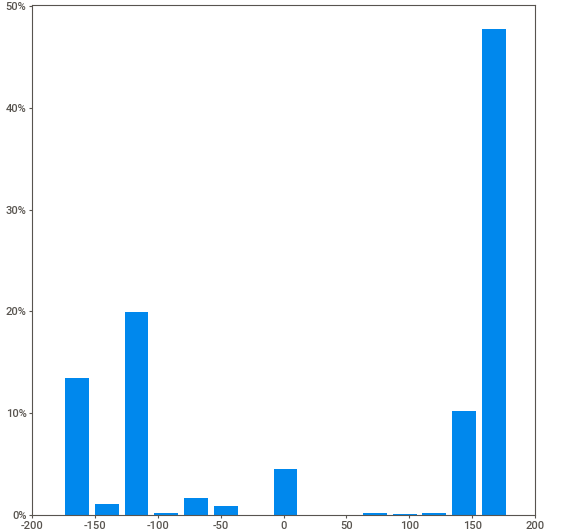
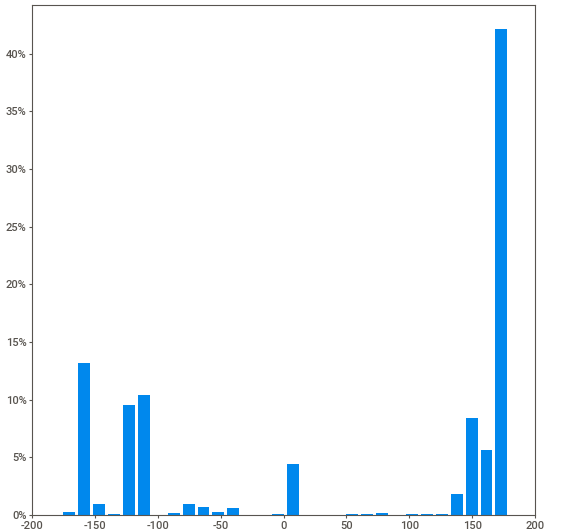
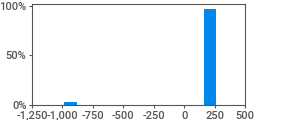
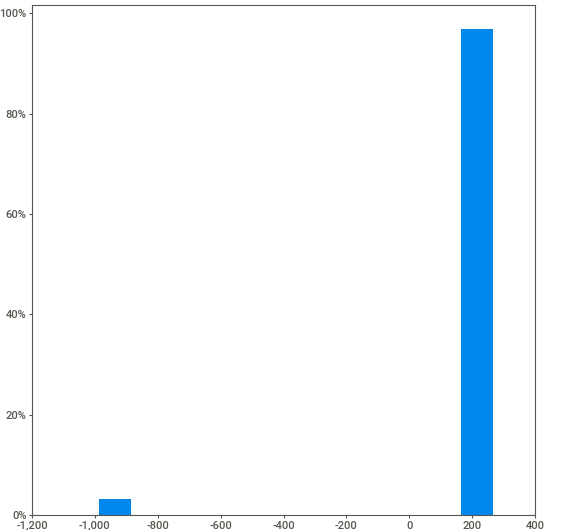
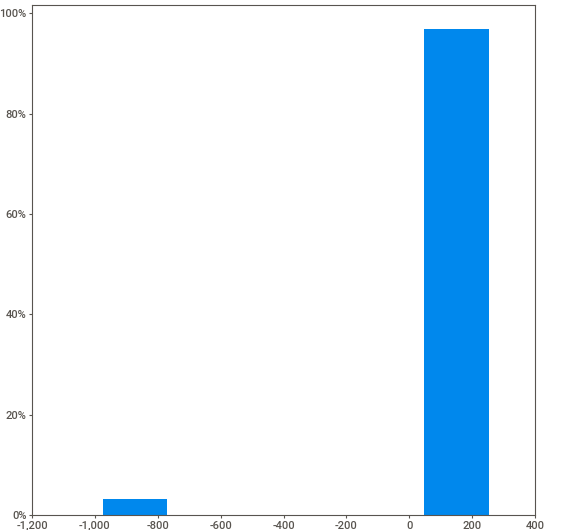
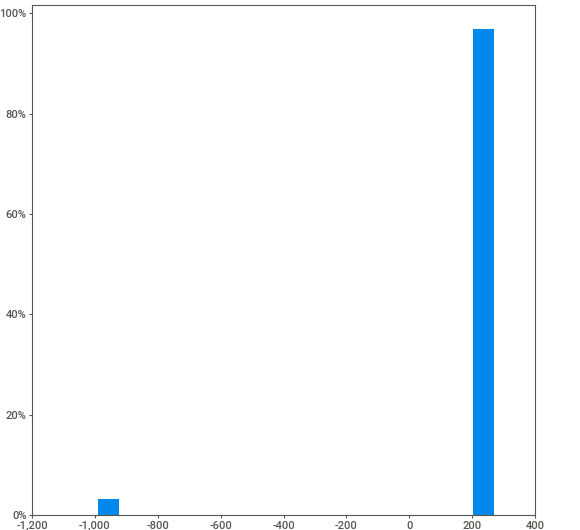
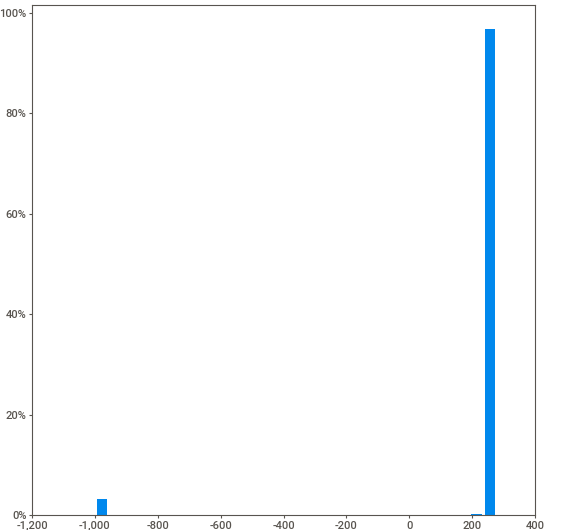
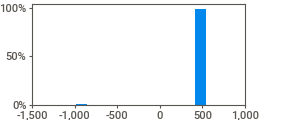
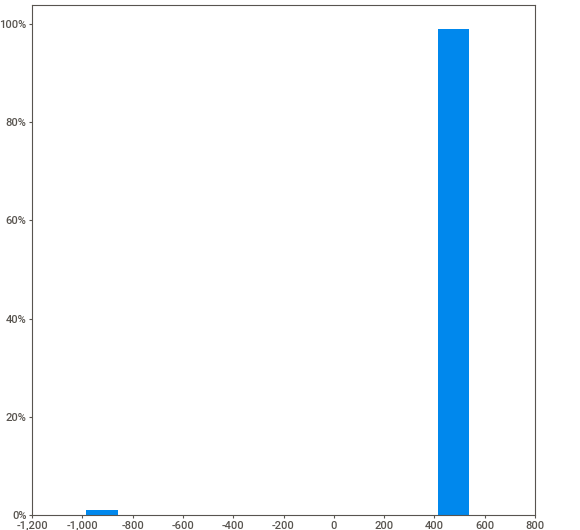
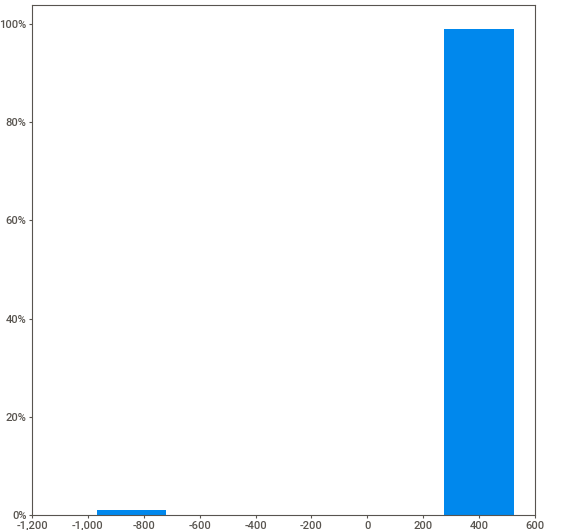
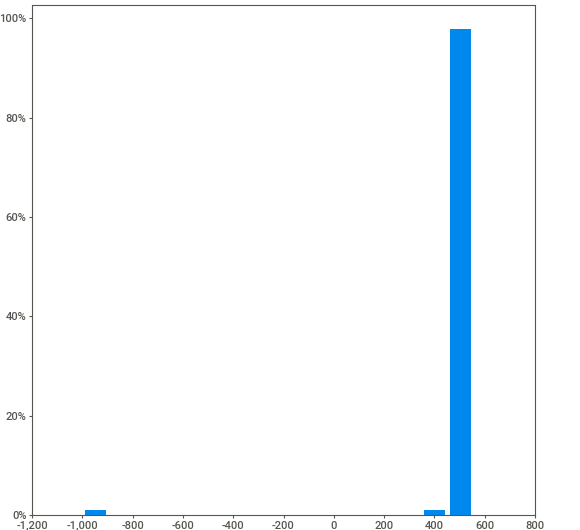
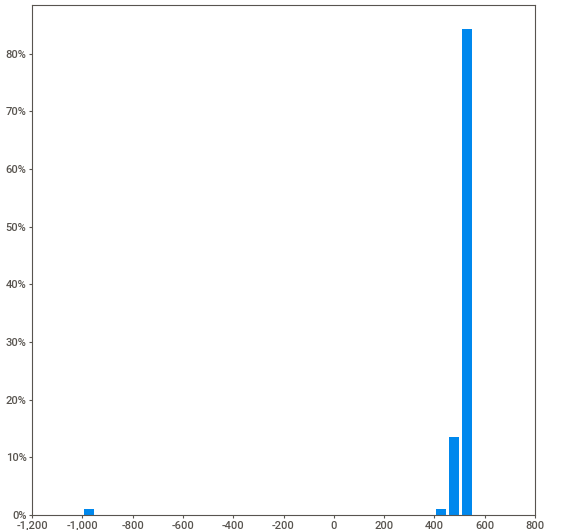
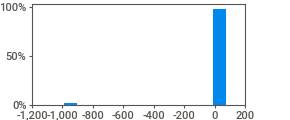
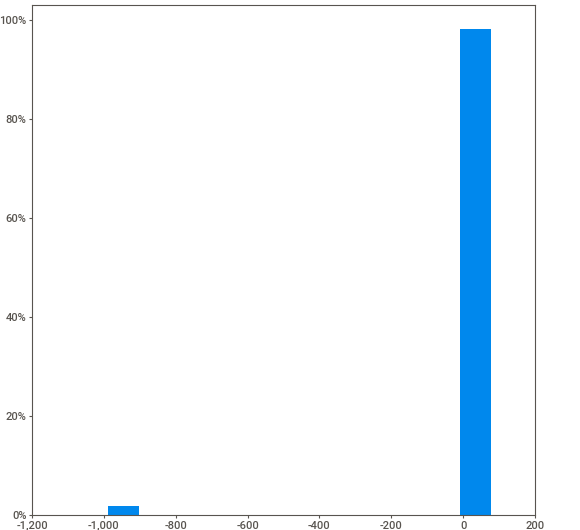
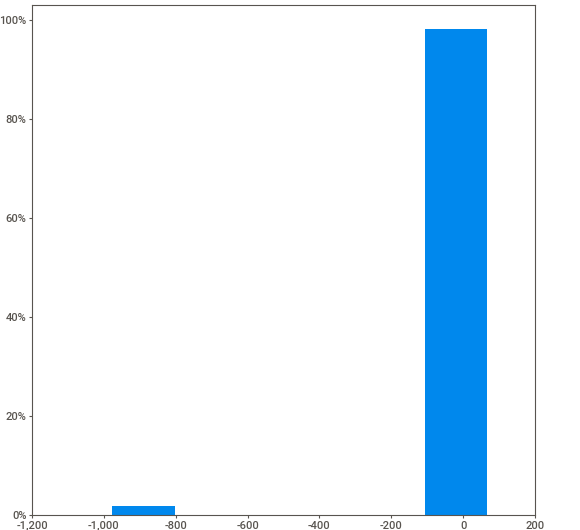
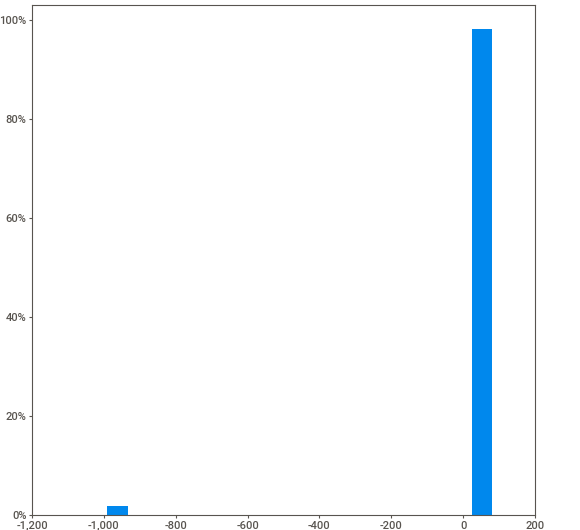
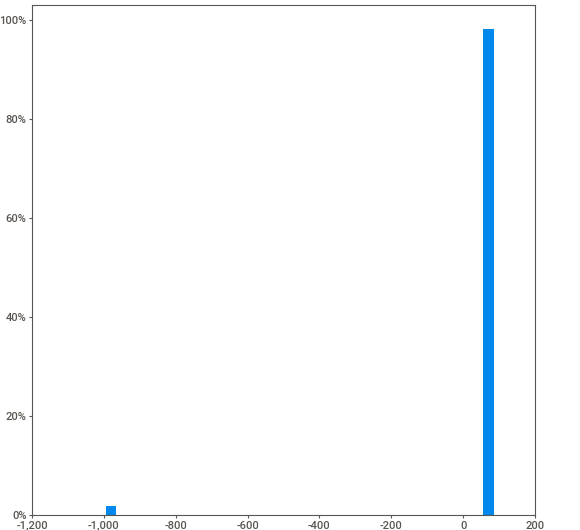
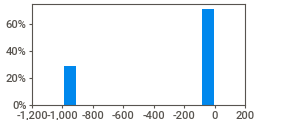
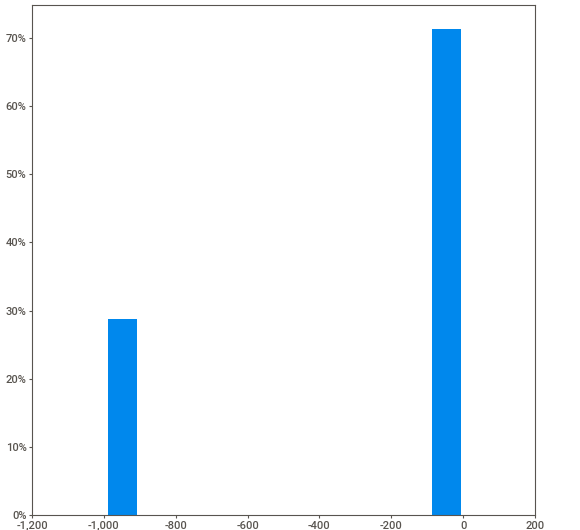
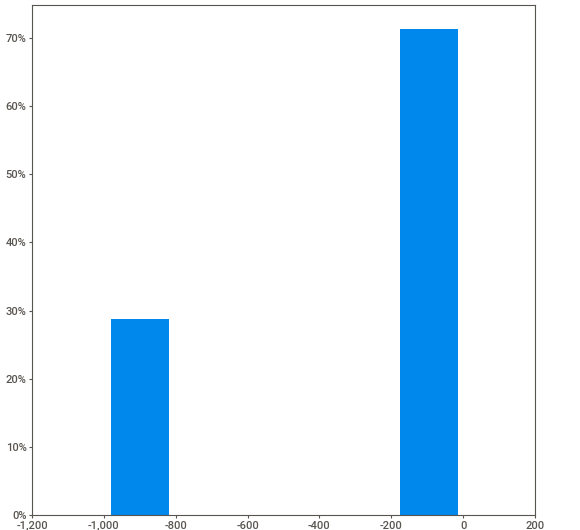
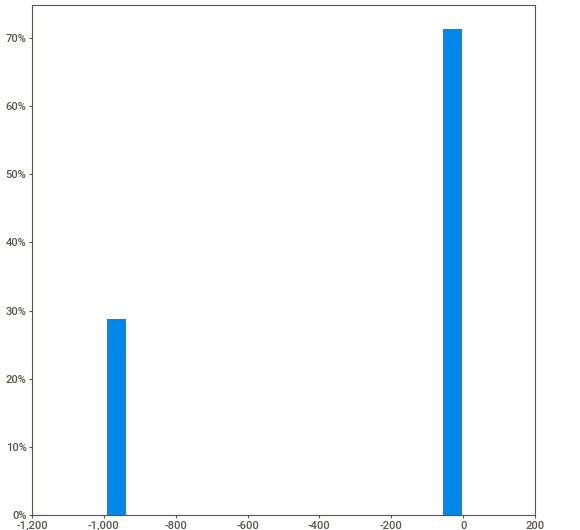
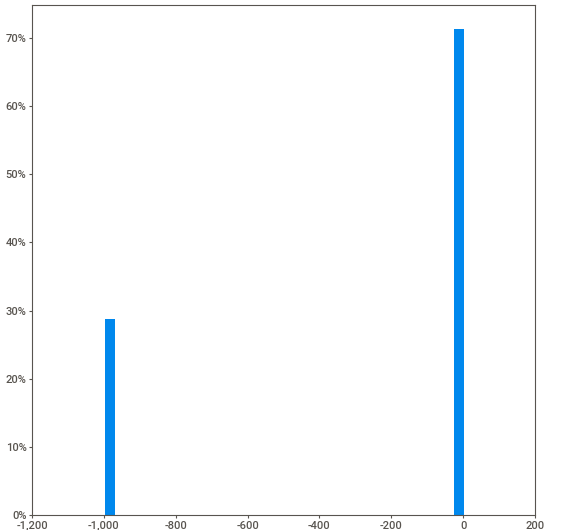
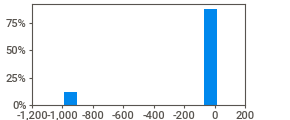
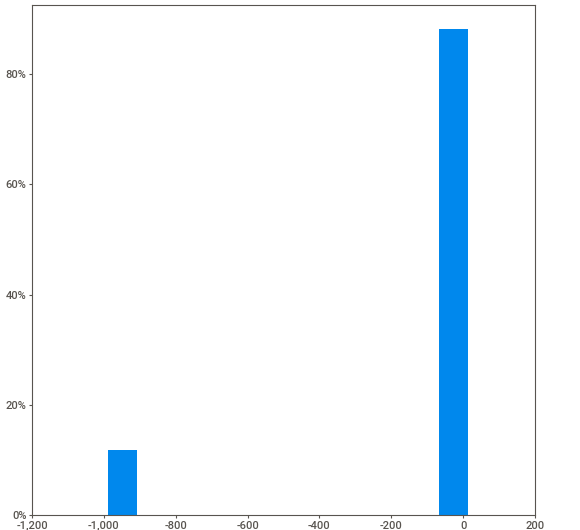
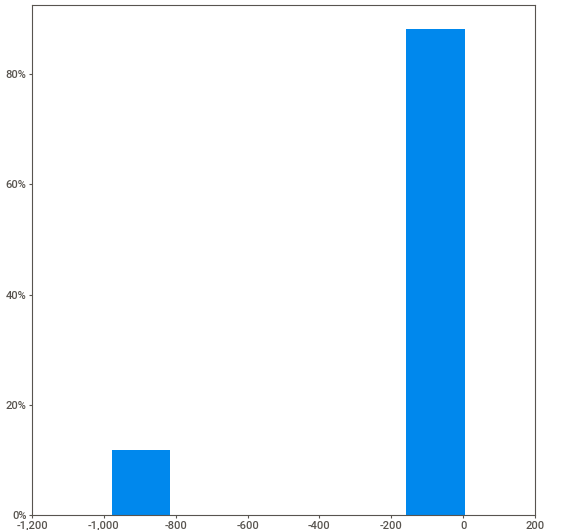
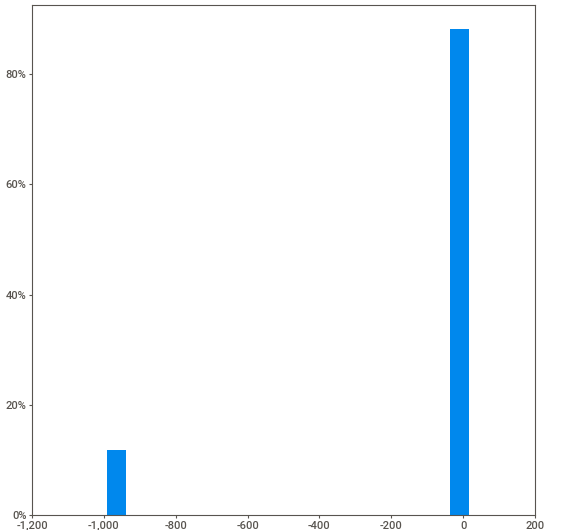
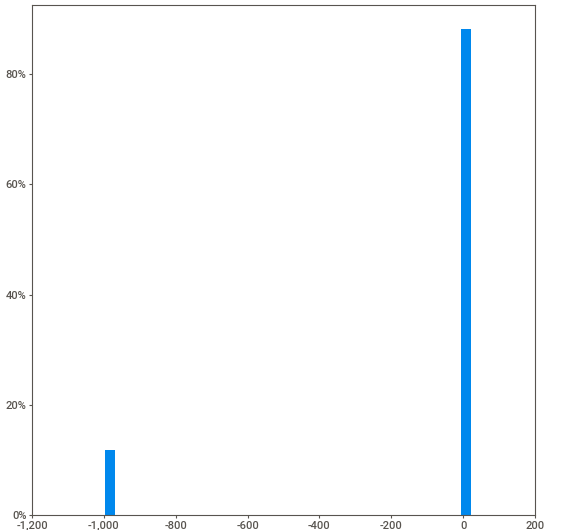
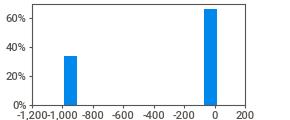
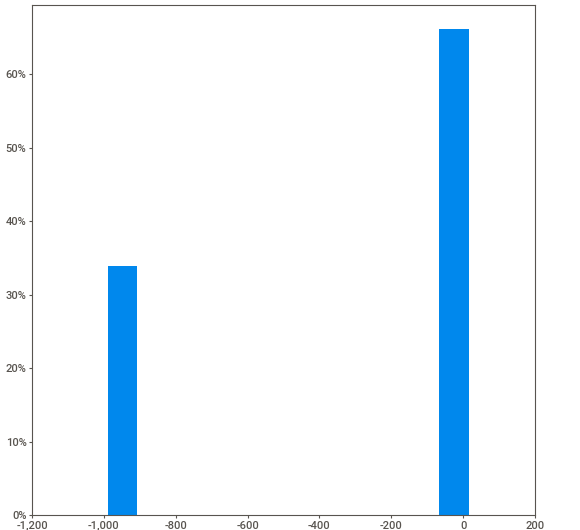
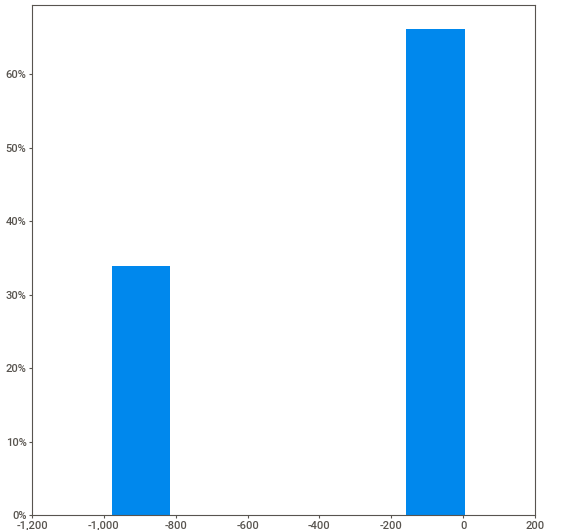
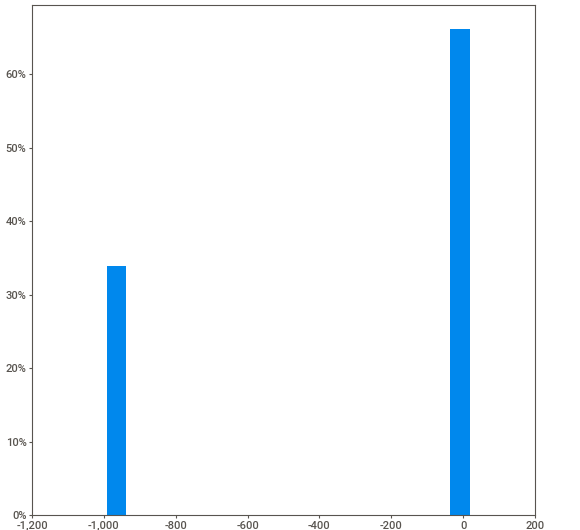
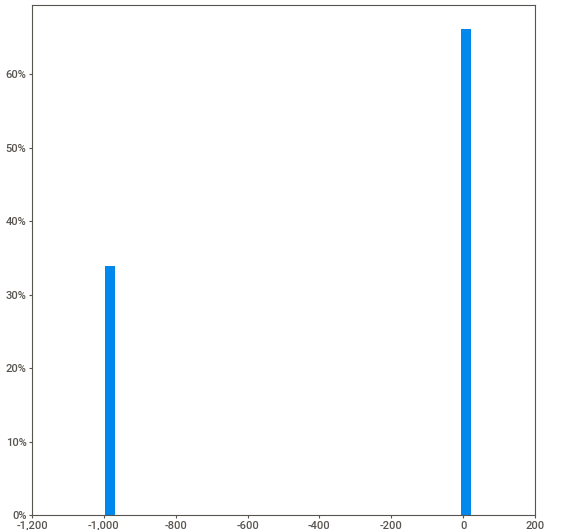
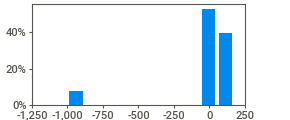
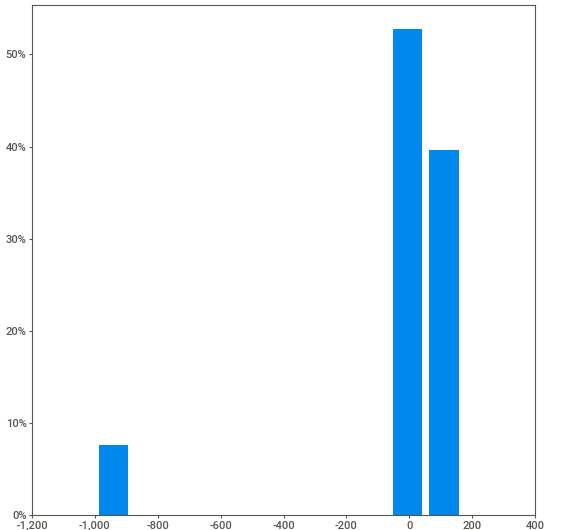
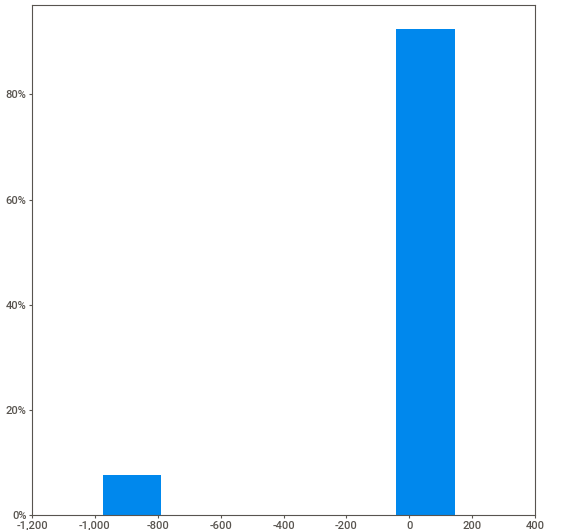
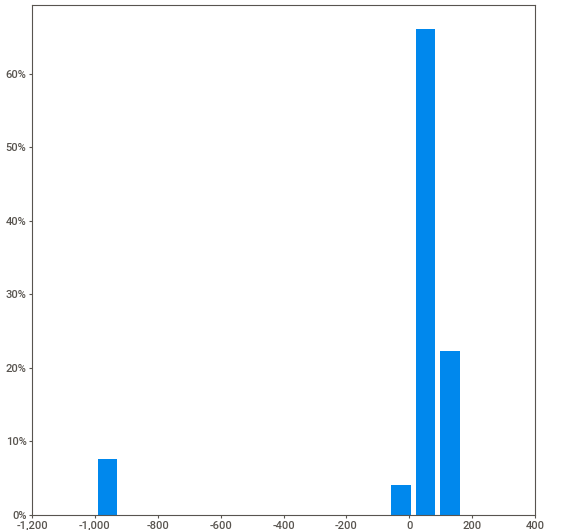
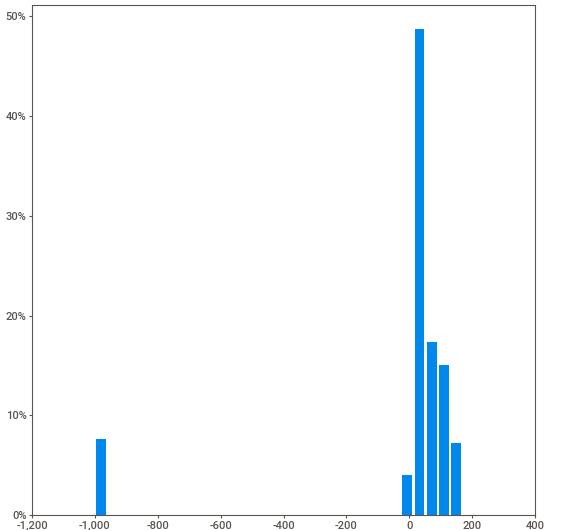
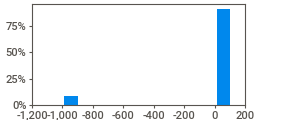
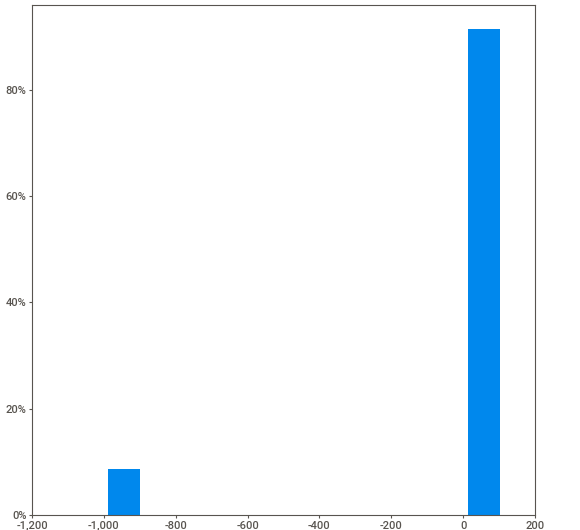
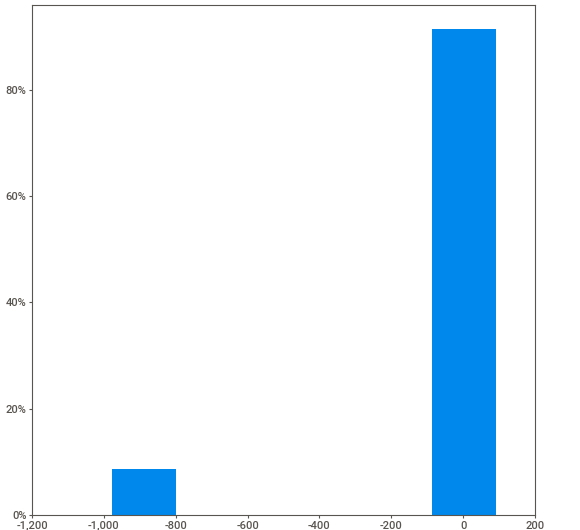
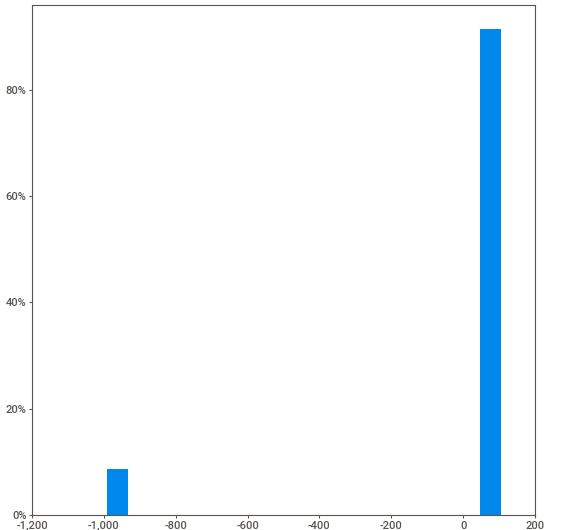
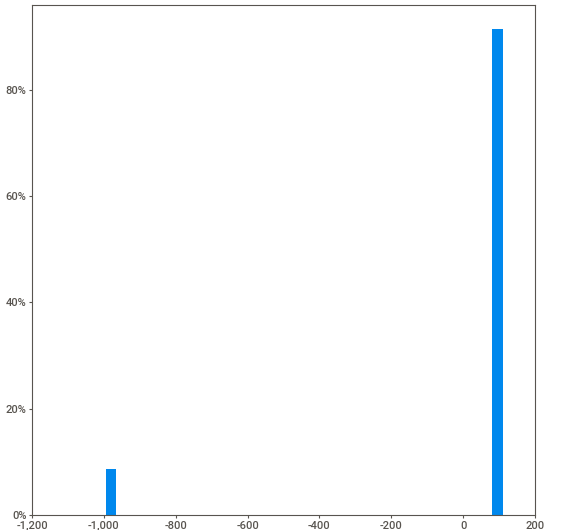
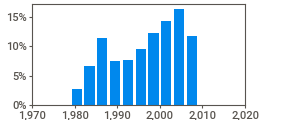
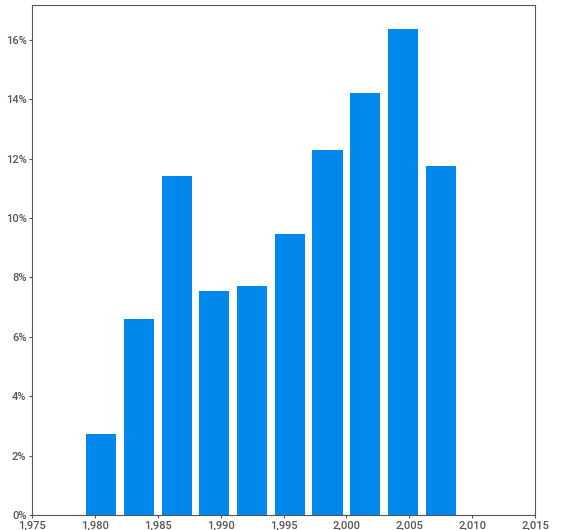
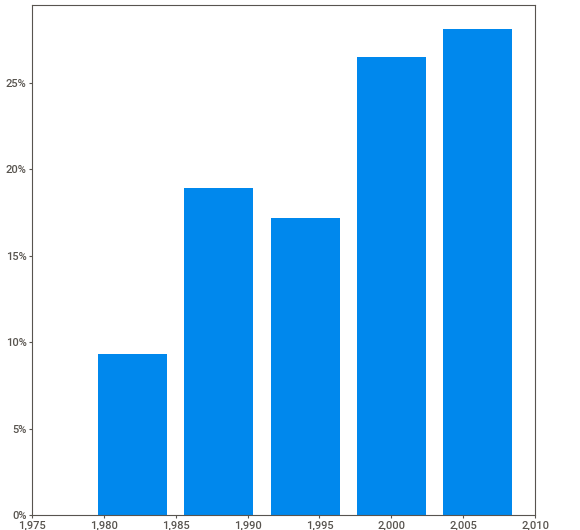
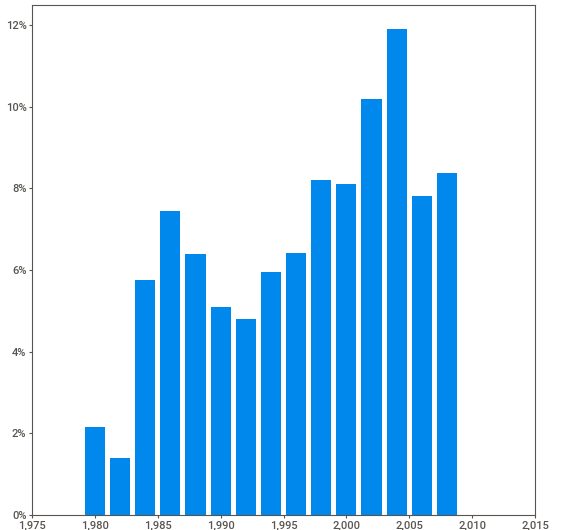
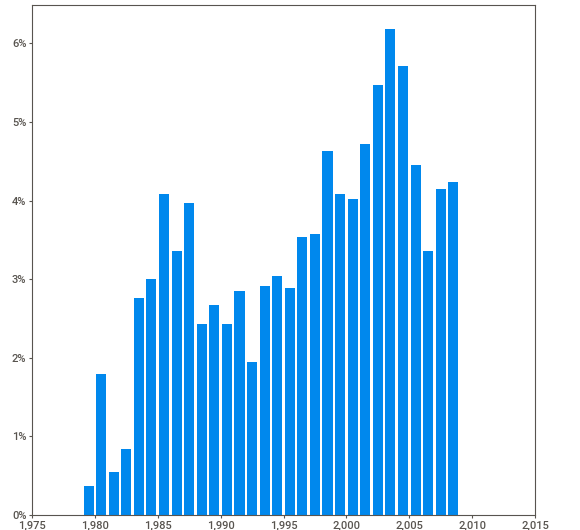
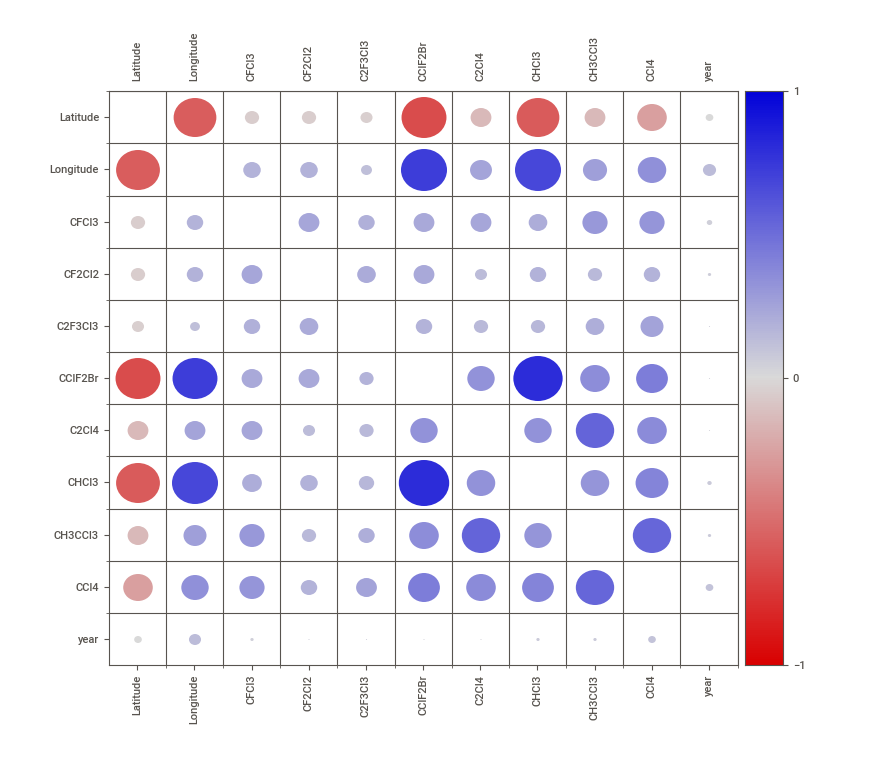
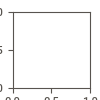

In [38]:
haloviz = sv.analyze(halogen.drop(columns=['Can']))
haloviz.show_notebook()

## What is the distribution of halogens from 1980 to 2010 in total ?

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='year'>

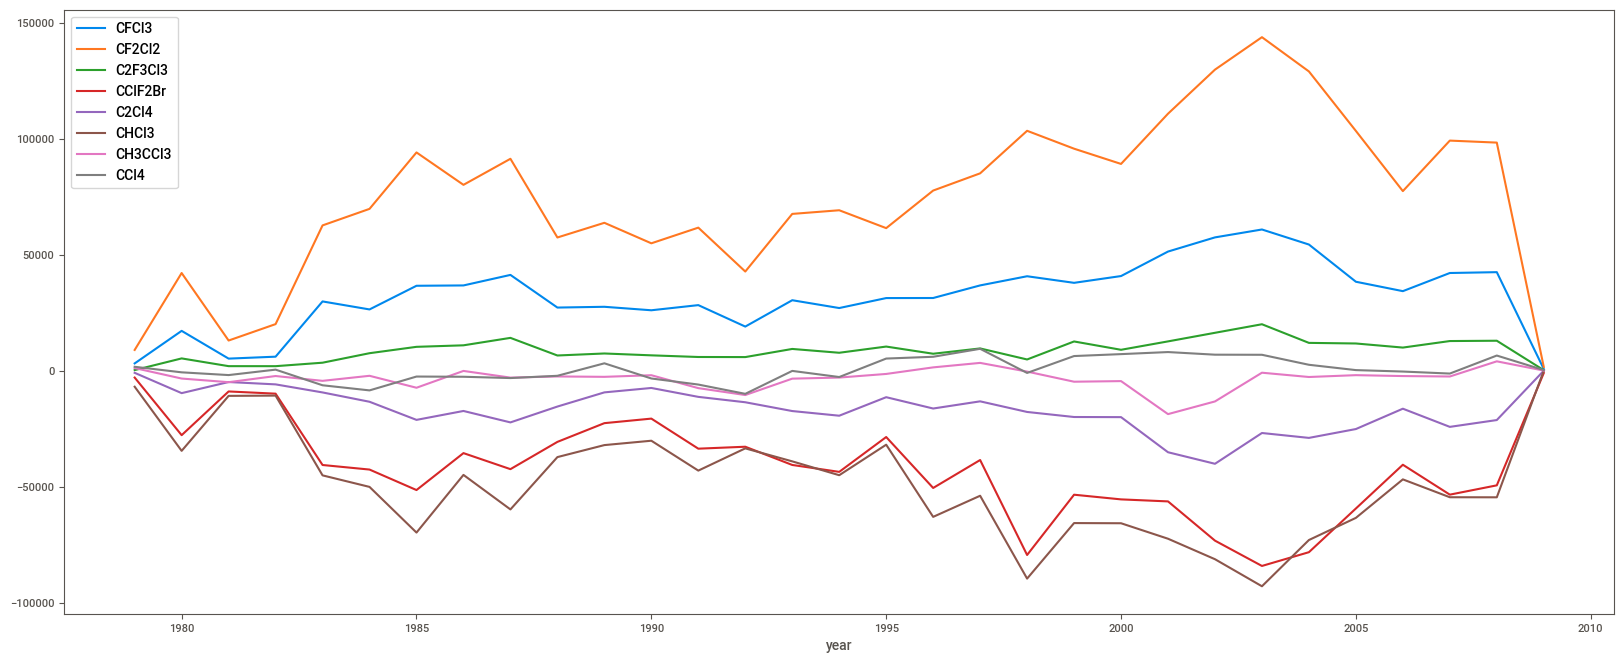

In [39]:
halogen.groupby(['year'])["CFCl3","CF2Cl2","C2F3Cl3","CClF2Br","C2Cl4","CHCl3","CH3CCl3","CCl4"].sum().plot(figsize=(20,8))

In [40]:
# select value = -999
gas_cols = ["CFCl3","CF2Cl2","C2F3Cl3","CClF2Br","C2Cl4","CHCl3","CH3CCl3","CCl4"]
sub_halogen = halogen[gas_cols]

In [42]:
halogen[sub_halogen < 0]

,Can,Location,date,Latitude,Longitude,CFCl3,CF2Cl2,C2F3Cl3,CClF2Br,C2Cl4,CHCl3,CH3CCl3,CCl4,year
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN
4529,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4530,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4531,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
